In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  2. Data preperation

In [110]:
%load_ext autoreload
%aimport data_prep
%run data_prep.py
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Datasets

In [77]:
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")

### Columns cleaning

In [78]:
#Join Labels with Train data
train_data = addLabelToTrainData(train_data, train_labels)

#Drop id and recorded from train dataset 
train_data = prepareCols(train_data)
test_data = prepareCols(test_data)


`status_group` added to train_data 

['id', 'recorded_by', 'scheme_name', 'wpt_name', 'waterpoint_type_group'] removed from dataset 

['id', 'recorded_by', 'scheme_name', 'wpt_name', 'waterpoint_type_group'] removed from dataset 



### Shortlisting columns

Shortlist Trainning set columns

In [79]:
train_data_transformed = train_data.copy()


# installer
train_data_transformed = shortlist_installer(train_data_transformed)

# funder
train_data_transformed = shortlist_funder(train_data_transformed)

# lga
train_data_transformed = shortlist_lga(train_data_transformed)

# extraction_type
train_data_transformed = shortlist_extraction_type(train_data_transformed)

#scheme_management
train_data_transformed = shortlist_scheme_management(train_data_transformed)

#region_code
train_data_transformed = shortlist_region_code(train_data_transformed)




`installer` shortlisted to {'Commu', 'DANIDA', 'DWE', 'Government', 'RWE', 'other'} only 

`funder` shortlisted to {'Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef','Tasaf','District Council', 'other'} only 

`lga` shortlisted to {'Njombe','Arusha Rural','Moshi Rural','Bariadi','Rungwe','Kilosa','Kasulu','Mbozi','Meru','Bagamoyo', 'other'} only 

`extraction_type` shortlisted to {'gravity','nira/tanira','submersible','swn 80','mono','india mark ii','afridev','ksb', 'other'} only 

`scheme_management` shortlisted to {'VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company', 'other'} only 

`region_code` shortlisted to {11,17,12,3,5,18,19,2,16,10,4,1,13,14,20, 'other'} only 



Shortlist Test set columns

In [80]:
test_data_transformed = test_data.copy()


# installer
test_data_transformed = shortlist_installer(test_data_transformed)

# funder
test_data_transformed = shortlist_funder(test_data_transformed)

# lga
test_data_transformed = shortlist_lga(test_data_transformed)

# extraction_type
test_data_transformed = shortlist_extraction_type(test_data_transformed)

#scheme_management
test_data_transformed = shortlist_scheme_management(test_data_transformed)

#region_code
test_data_transformed = shortlist_region_code(test_data_transformed)




`installer` shortlisted to {'Commu', 'DANIDA', 'DWE', 'Government', 'RWE', 'other'} only 

`funder` shortlisted to {'Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef','Tasaf','District Council', 'other'} only 

`lga` shortlisted to {'Njombe','Arusha Rural','Moshi Rural','Bariadi','Rungwe','Kilosa','Kasulu','Mbozi','Meru','Bagamoyo', 'other'} only 

`extraction_type` shortlisted to {'gravity','nira/tanira','submersible','swn 80','mono','india mark ii','afridev','ksb', 'other'} only 

`scheme_management` shortlisted to {'VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company', 'other'} only 

`region_code` shortlisted to {11,17,12,3,5,18,19,2,16,10,4,1,13,14,20, 'other'} only 



### Impute Values 

In [82]:
# Impute 0 for regions of 'Dodoma','Kagera','Mbeya','Tabora' this regions 0 ar actually missing values
train_data_transformed = amount_tsh_impute_regions(train_data_transformed)

amount_tsh imputed with mean for regions: ['Dodoma','Kagera','Mbeya','Tabora']




In [83]:
#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
train_data_transformed = impute_lat(train_data_transformed)


latitude imputed with mean


In [84]:
#Impute Longitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
train_data_transformed = impute_long(train_data_transformed)

longitude imputed with mean


In [86]:
#Impute Population by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
# train_data_transformed = impute_pop(train_data_transformed)


In [87]:
# Impute 0 for regions of 'Dodoma','Kagera','Mbeya','Tabora' this regions 0 ar actually missing values
test_data_transformed = amount_tsh_impute_regions(test_data_transformed)

amount_tsh imputed with mean for regions: ['Dodoma','Kagera','Mbeya','Tabora']




In [88]:
#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
test_data_transformed = impute_lat(test_data_transformed)

latitude imputed with mean


In [89]:
#Impute Longitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
test_data_transformed = impute_long(test_data_transformed)


longitude imputed with mean


In [ ]:
#Impute Population by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
# test_data_transformed = impute_pop(test_data_transformed)

### Add Outside Data

In [91]:
# train_data = density(train_data)
# test_data = density(test_data)

### Conversions
#### Convert `construction_year`

In [92]:
# construction_year - converts it to years elapsed (AKA age) -- (zeroes ignored)
train_data_transformed = convert_construction_year(train_data_transformed)

`construction_year` converted to `age`, which is elapsed years (zeroes ignored) 



In [93]:
# construction_year - converts it to years elapsed (AKA age) -- (zeroes ignored)
test_data_transformed = convert_construction_year(test_data_transformed)

`construction_year` converted to `age`, which is elapsed years (zeroes ignored) 



### ^^^^^^^^^^^^^^^^^^^^^^^^^^ What to do with zeros here ? (summary  ↓ ) -- currently imputing with median

In [94]:
zeroes =    train_data_transformed['age'][train_data_transformed['age'] == 0].count() / train_data_transformed['age'].count()
mean = np.mean(train_data_transformed['age'][train_data_transformed['age'] != 0])
median = np.median(train_data_transformed['age'][train_data_transformed['age'] != 0])

print("% of zeroes: {}".format(zeroes))

print("mean: {}".format(mean))


print("median: {}".format(median))

# impute with median
train_data_transformed[train_data_transformed['age'] == 0][["age"]] = median
test_data_transformed[test_data_transformed['age'] == 0][["age"]] = median

% of zeroes: 0.34863636363636363
mean: 22.185314414204854
median: 19.0


#### Convert `date_recorded`

In [95]:
train_data_transformed = convert_date_recorded(train_data_transformed)

`date_recorded` converted to `days_since_recoreded`, which is elapsed days (zeroes ignored) 



In [96]:
test_data_transformed = convert_date_recorded(test_data_transformed)

`date_recorded` converted to `days_since_recoreded`, which is elapsed days (zeroes ignored) 



### Binning

In [97]:
train_data_transformed = bin_feature(train_data_transformed, "days_since_recoreded", 10)

`days_since_recoreded` has been binned to 10 categories:
IntervalIndex([(1917.932, 2328.8], (2328.8, 2735.6], (2735.6, 3142.4], (5176.4, 5583.2], (5583.2, 5990.0]]
              closed='right',
              dtype='interval[float64]')




In [98]:
test_data_transformed = bin_feature(test_data_transformed, "days_since_recoreded", 10)

`days_since_recoreded` has been binned to 10 categories:
IntervalIndex([(1917.365, 2385.5], (2385.5, 2849.0], (2849.0, 3312.5], (5166.5, 5630.0], (6093.5, 6557.0]]
              closed='right',
              dtype='interval[float64]')




In [ ]:
numerical = ['amount_tsh', 'gps_height', 'num_private', 'population']
other = ['longitude', 'latitude', "status_code"]
categorical = list(set(train_data_transformed.columns) - set(numerical) - set(other))
categorical

In [111]:
### Add distance to capital

In [114]:
train_data_transformed = distance_capital(train_data_transformed)

In [116]:
train_data_transformed[['distance']].head()

,distance
0,1.459527e+06
1,1.459527e+06
2,1.459527e+06
3,1.459527e+06
4,1.459527e+06


### Fixing the Skewness

In [100]:
train_data_transformed['latitude'] = train_data_transformed["latitude"].astype('category') 
train_data_transformed['longitude'] = train_data_transformed["longitude"].astype('category') 

test_data_transformed['latitude'] = test_data_transformed["latitude"].astype('category') 
test_data_transformed['longitude'] = test_data_transformed["longitude"].astype('category') 

In [102]:
feature_skewness(train_data_transformed)

(num_private      91.931428
 amount_tsh       57.806340
 district_code     3.961945
 age               0.811613
 gps_height        0.462390
 population             NaN
 dtype: float64,
 ['amount_tsh',
  'gps_height',
  'num_private',
  'district_code',
  'population',
  'age'])

In [103]:
feature_skewness(test_data_transformed)

(num_private      50.739385
 amount_tsh       43.853431
 population        8.216318
 district_code     3.958939
 age               0.832370
 gps_height        0.497043
 dtype: float64,
 ['amount_tsh',
  'gps_height',
  'num_private',
  'district_code',
  'population',
  'age'])

In [104]:
train_data_transformed = fix_skewness(train_data_transformed)

In [105]:
test_data_transformed = fix_skewness(test_data_transformed)

# Correlation matrix

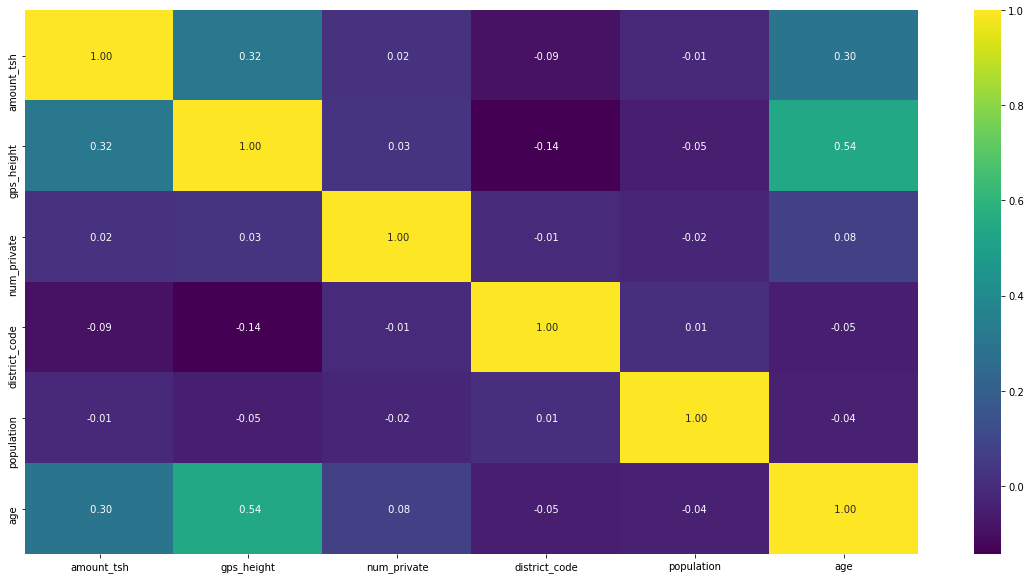

In [106]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_data_transformed.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

#  Save Data

In [108]:
#train_data_transformed.status_group.replace(['functional', 'non functional','functional needs repair'], [1, 2, 3], inplace=True)
labels_prepared = train_data_transformed[["status_group"]]
train_data_transformed = train_data_transformed.drop(columns=["status_group"])
#train_data_transformed = onehot_encode(train_data_transformed)
train_data_transformed.to_csv("train_data_prepared.csv")
labels_prepared.to_csv("labels_prepared.csv")

In [ ]:
test_data_transformed.to_csv("test_data_prepared.csv")